In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('dodgers-2022.csv')

# Display the first few rows of the dataframe to understand its structure and contents
data.head()


,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


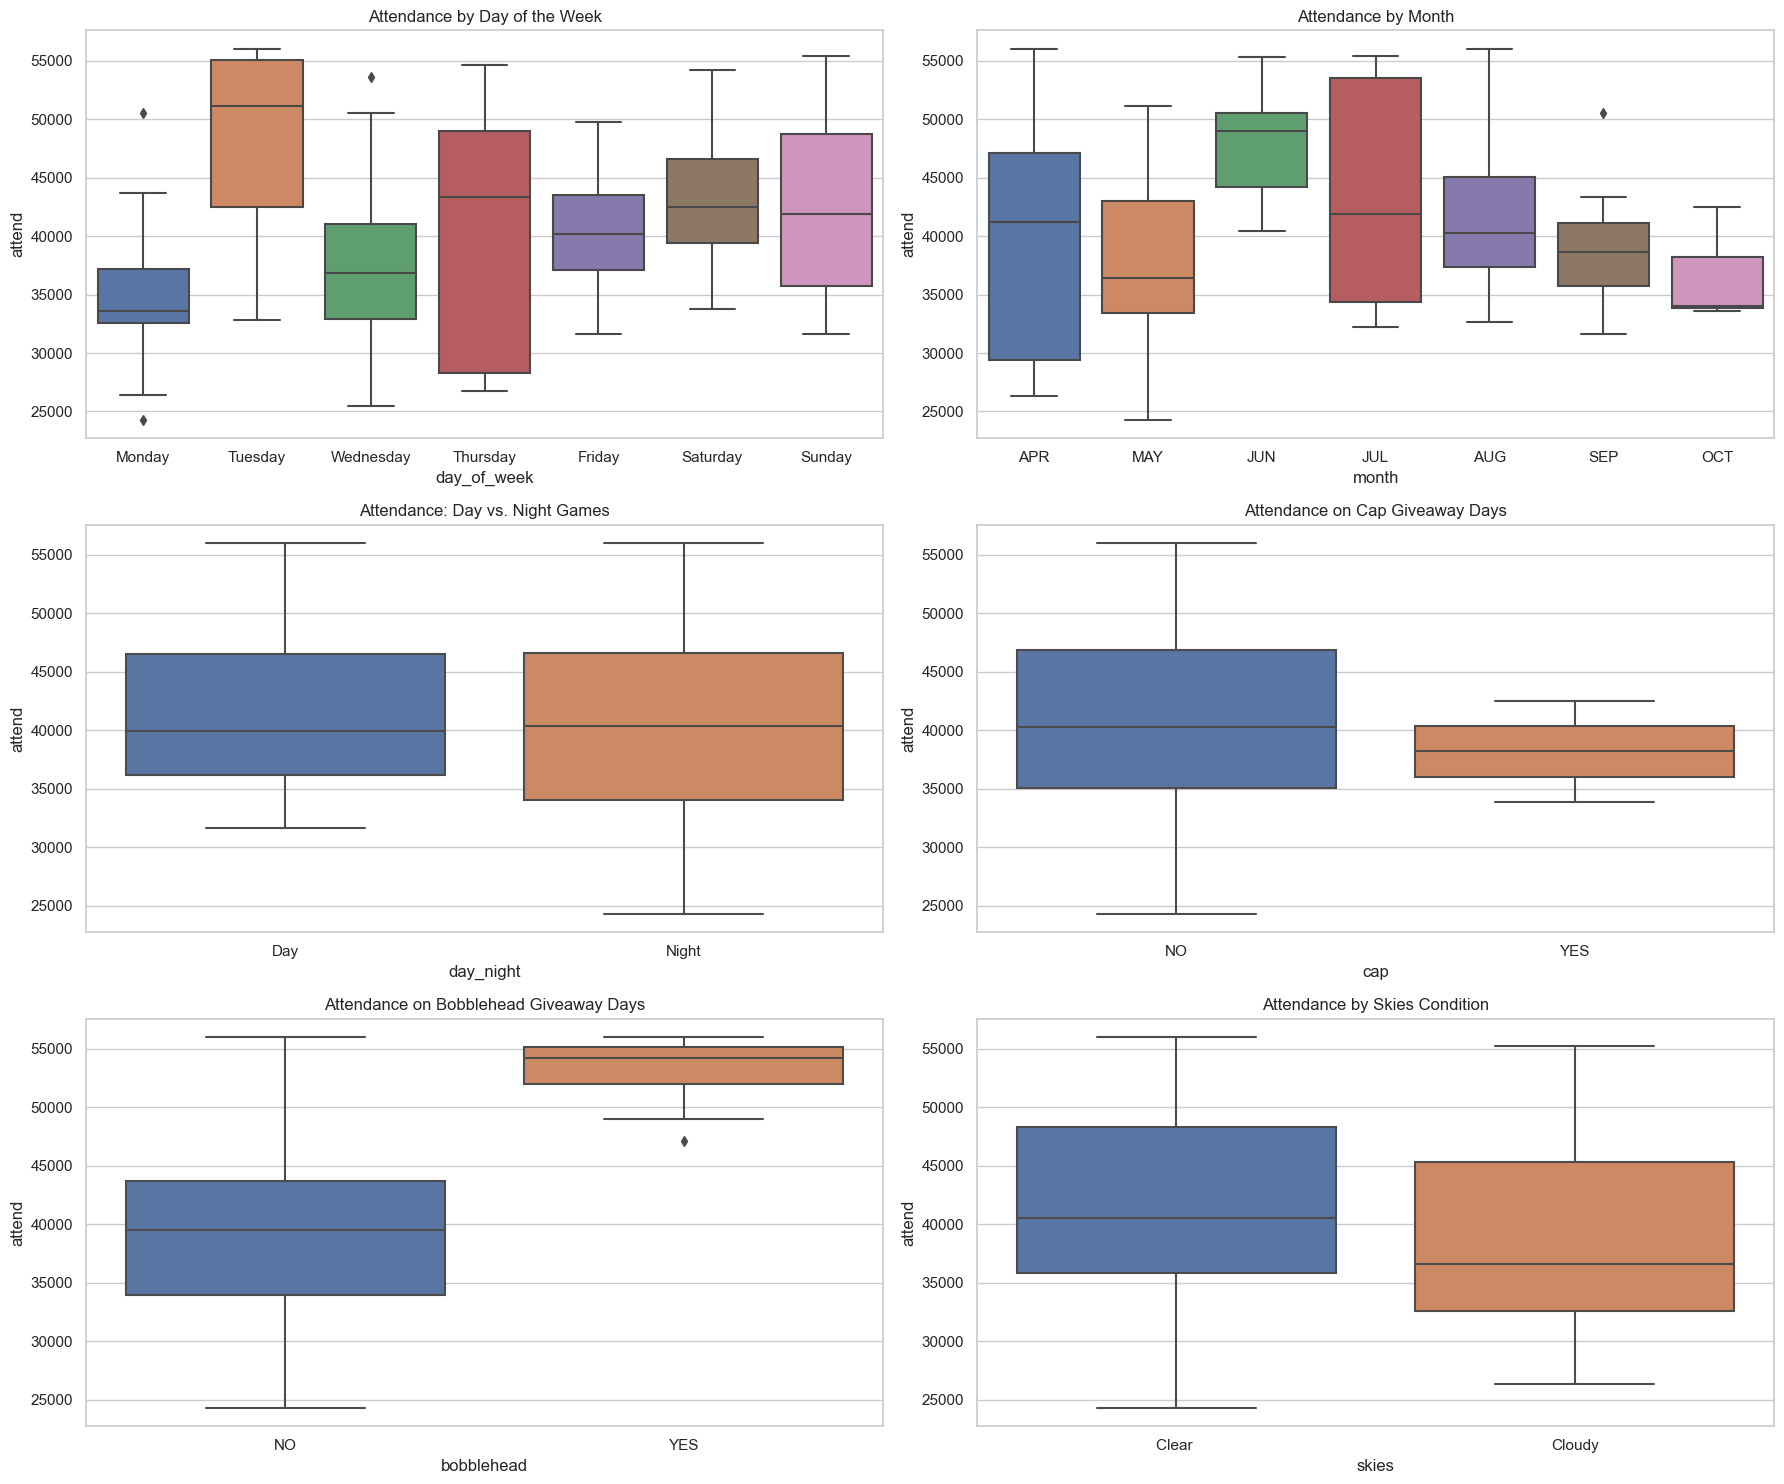

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetics for the plots
sns.set(style="whitegrid")

# Analyzing attendance trends based on different factors
fig, axes = plt.subplots(3, 2, figsize=(18, 15))

# Day of the week
sns.boxplot(x='day_of_week', y='attend', data=data, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], ax=axes[0, 0])
axes[0, 0].set_title('Attendance by Day of the Week')

# Month
sns.boxplot(x='month', y='attend', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Attendance by Month')

# Day or Night game
sns.boxplot(x='day_night', y='attend', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Attendance: Day vs. Night Games')

# Promotional Items - Cap
sns.boxplot(x='cap', y='attend', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Attendance on Cap Giveaway Days')

# Promotional Items - Bobblehead
sns.boxplot(x='bobblehead', y='attend', data=data, ax=axes[2, 0])
axes[2, 0].set_title('Attendance on Bobblehead Giveaway Days')

# Skies Condition
sns.boxplot(x='skies', y='attend', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Attendance by Skies Condition')

plt.tight_layout()
plt.show()


These plots provide valuable insights how different factors can influence game attendance. Attendance by the day of the week, look to have a pattern where weekends tend to have higher attendance compared to weekdays, this could be because people have more free time on the weekends. Attendance by the month looks to fluctuate across the different months, with some moths having a higher median attendance. Attendnace for Day vs Night games, night games appear to draw higher attendance than day games, this could be for various reasons, but accessibility is a main factor that comes to my mind. Attendance on promotional days, cap giveaways does not seem to have a significant different in attendance, bobblehead giveaways have a clear increwade in attendance, indicating bobbleheads are a popular promotion. Attendance by skies condition, clear skies vs cloudy does not seem to have a significant impact on attendance. 

In [3]:
# Correlation between attendance and temperature
correlation = data[['attend', 'temp']].corr()
print(correlation)


          attend      temp
attend  1.000000  0.098951
temp    0.098951  1.000000


The analysis shows a very weak positive correlation of approximately 0.099 between game attendance and temperature, indicating that temperature alone has minimal influence on attendance figures. This suggests that while there might be a slight preference for attending games on warmer days, temperature is not a significant determinant of attendance. Therefore, strategies to improve attendance should focus more on other factors such as game scheduling, promotions, and enhancing the overall game-day experience

/Applications/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


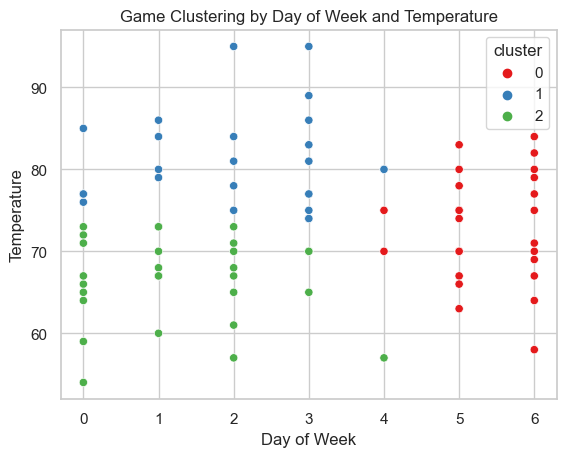

In [5]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Encoding the day_of_week to numerical values for clustering
data['day_of_week_num'] = data['day_of_week'].astype('category').cat.codes

# Selecting features for clustering
features = data[['day_of_week_num', 'temp']]

# Standardizing features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Clustering using k-means
kmeans = KMeans(n_clusters=3)
data['cluster'] = kmeans.fit_predict(scaled_features)

# Visualizing the clusters
sns.scatterplot(x='day_of_week_num', y='temp', hue='cluster', data=data, palette='Set1')
plt.title('Game Clustering by Day of Week and Temperature')
plt.xlabel('Day of Week')
plt.ylabel('Temperature')
plt.show()


These clusters can inform easier attendance strategies. By understanding the distinct characteristics of each cluster, management can tailor marketing and promotional efforts to the specific types of games within each cluster. For instance, if one cluster indeed corresponds to high-attendance games, similar strategies might be applied to other games within that cluster to maintain or enhance attendance levels. Conversely, for clusters associated with lower attendance, targeted initiatives can be developed to address the specific deterrents for those game types

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Preparing the data
data = pd.get_dummies(data, columns=['day_of_week', 'skies', 'day_night', 'cap', 'shirt', 'fireworks', 'bobblehead'], drop_first=True)

# Defining the features and target variable
X = data.drop(['attend', 'month', 'day', 'opponent'], axis=1)
y = data['attend']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fitting a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 84388993.75504425


The regression model resulted in a Mean Squared Error of approximately 84.39 million. This metric indicates the average squared difference between the actual attendance figures and those predicted by our model. Given the scale of attendance numbers, this MSE suggests that while our model captures some patterns in the data, there is a significant amount of variability that it does not account for.This level of MSE underscores the complexity of predicting game attendance and suggests that factors not included in our model may play a significant role in influencing attendance numbers. These could include unmodeled aspects like the game's importance, special events, or competitor team popularit

In conclusion, Our comprehensive analysis of the Dodgers' 2022 game attendance data has revealed several important insights that can guide management's efforts to enhance attendance figures. By examining patterns across various factors such as day of the week, promotional events, and weather conditions, we've identified specific areas where targeted strategies could yield significant improvements.

Key Findings:

Weekend and Night Games: Attendance peaks during weekend games, especially on Saturdays, and for games held at night. This suggests that these times are more convenient for the majority of fans, likely due to work schedules and the appeal of evening outings.
Promotional Impact: Promotional events, particularly bobblehead giveaways, have a marked positive impact on attendance. This indicates that high-value promotions are a significant draw for fans.
Minimal Weather Influence: The correlation analysis between attendance and temperature showed a very weak positive relationship, suggesting that weather conditions have a minimal direct impact on attendance decisions.
Diverse Attendance Patterns: The clustering analysis highlighted that games could be grouped into distinct clusters based on day of the week and temperature, hinting at varied fan preferences and potential for targeted marketing.
Predictive Modeling Limitations: The regression analysis, indicated by a high Mean Squared Error, showed that while our model captured some attendance trends, significant variability remains unexplained, pointing to the influence of unmodeled factors.
Recommendations:

Based on our findings, we recommend the following strategies to boost attendance:

Maximize Weekend and Evening Games: Schedule more high-profile games and promotions during these times to capitalize on higher availability and interest.
Enhance Promotional Value: Expand on popular promotions like bobblehead giveaways and explore new, innovative promotional concepts to engage fans.
Tailor Strategies to Game Clusters: Develop specific marketing and engagement strategies for each identified game cluster, addressing the unique preferences and behaviors of different fan segments.
Further Data Exploration: Investigate additional factors not covered in this analysis, such as opponent strength, special events, and broader economic conditions, to gain a more complete understanding of attendance drivers.
Moving Forward:

Improving game attendance is a multifaceted challenge that requires a nuanced approach. By leveraging the insights gained from this analysis and continuously refining our understanding of fan preferences and behaviors, the Dodgers can develop more effective strategies to enhance the game-day experience and attract more fans to the stadium.